In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import glob
import re
from datetime import datetime

data = pd.read_csv('burger_twitter.csv')
data['As Of Date'] = pd.to_datetime(data['As Of Date'], format = "%Y-%m-%d %H:%M:%S")

In [2]:
data

,Ticker Symbol,Entity Name,Unique ID,As Of Date,Screen Name,Is Verified,Is Protected,Date Joined,Tweets Count,Following,Followers,Likes,Listed Count,Twitter Id,Date Added,Date Updated,Ticker Sector,Ticker Industry
0,nasdaq:jack,18956020,53750562,2018-07-23,JackBox,True,False,2009-01-13 00:00:00,17001,10969,93844,3824,1338,18956020,20180723,2018-07-23 11:14:41,Consumer Services,Travel & Leisure
1,nasdaq:sonc,40349928,53751379,2018-07-23,sonicdrivein,True,False,2009-05-15 00:00:00,47122,4861,362848,1633,1556,40349928,20180723,2018-07-23 11:16:08,Consumer Services,Travel & Leisure
2,nasdaq:wen,59553554,53751651,2018-07-23,Wendys,True,False,2009-07-23 00:00:00,134451,1264,2730860,29550,5008,59553554,20180723,2018-07-23 11:16:36,Consumer Services,Travel & Leisure
3,vtx:bkw,167421802,53753796,2018-07-23,BurgerKing,True,False,2010-07-16 00:00:00,20843,3911,1648047,7488,3171,167421802,20180723,2018-07-23 11:20:06,Utilities,Electricity
4,nyse:mcd,321430105,53753313,2018-07-23,MeEncanta,True,False,2011-06-21 00:00:00,6789,2248,27392,1768,92,321430105,20180723,2018-07-23 11:19:18,Consumer Services,Travel & Leisure
5,nyse:mcd,2590023517,53753314,2018-07-23,365Black,True,False,2014-06-26 00:00:00,2233,512,11461,654,36,2590023517,20180723,2018-07-23 11:19:18,Consumer Services,Travel & Leisure
6,nyse:mcd,71026122,53753315,2018-07-23,McDonalds,True,False,2009-09-02 00:00:00,451081,14366,3485267,3747,8491,71026122,20180723,2018-07-23 11:19:18,Consumer Services,Travel & Leisure
7,nyse:mcd,18223550,53753316,2018-07-23,RMHC,True,False,2008-12-18 00:00:00,17561,2526,33979,11862,592,18223550,20180723,2018-07-23 11:19:18,Consumer Services,Travel & Leisure
8,nasdaq:jack,18956020,53741279,2018-07-22,JackBox,True,False,2009-01-13 00:00:00,16999,10968,93843,3825,1326,18956020,20180722,2018-07-22 02:43:06,Consumer Services,Travel & Leisure
9,nasdaq:sonc,40349928,53742096,2018-07-22,sonicdrivein,True,False,2009-05-15 00:00:00,47071,4862,362817,1633,1556,40349928,20180722,2018-07-22 02:47:48,Consumer Services,Travel & Leisure


In [3]:
data['Ticker Symbol'].unique()

array(['nasdaq:jack', 'nasdaq:sonc', 'nasdaq:wen', 'vtx:bkw', 'nyse:mcd'], dtype=object)

In [4]:
data['Screen Name'].unique()

array(['JackBox', 'sonicdrivein', 'Wendys', 'BurgerKing', 'MeEncanta',
       '365Black', 'McDonalds', 'RMHC', 'McDonaldsCorp'], dtype=object)

In [5]:
import social_twitter as st

('Authorization Token:', u'fbee651ab5dd9fa9ad0318a2ea61b120', 'Expires:', u'20180726T124809Z')


In [6]:
df = st.multi_tickers(['nyse:mcd','nasdaq:wen','nasdaq:jack', 'nasdaq:sonc'])

1001
2001
3001
4001
5001
6001
7001


In [7]:
df

,Ticker Symbol,Entity Name,Unique ID,As Of Date,Screen Name,Is Verified,Is Protected,Date Joined,Tweets Count,Following,Followers,Likes,Listed Count,Twitter Id,Date Added,Date Updated,Ticker Sector,Ticker Industry
0,nasdaq:jack,18956020,53769138,2018-07-25,JackBox,True,False,20090113T000000Z,17010,10967,93853,3822,1325,18956020,20180724,20180724T233038Z,Consumer Services,Travel & Leisure
1,nasdaq:sonc,40349928,53769959,2018-07-25,sonicdrivein,True,False,20090515T000000Z,47218,4860,362961,1633,1557,40349928,20180724,20180724T233431Z,Consumer Services,Travel & Leisure
2,nasdaq:wen,59553554,53770231,2018-07-25,Wendys,True,False,20090723T000000Z,134697,1265,2733236,29603,5010,59553554,20180724,20180724T233545Z,Consumer Services,Travel & Leisure
3,nyse:mcd,321430105,53771893,2018-07-25,MeEncanta,True,False,20110621T000000Z,6791,2248,27390,1768,92,321430105,20180724,20180724T234221Z,Consumer Services,Travel & Leisure
4,nyse:mcd,2590023517,53771894,2018-07-25,365Black,True,False,20140626T000000Z,2233,511,11458,654,36,2590023517,20180724,20180724T234221Z,Consumer Services,Travel & Leisure
5,nyse:mcd,71026122,53771895,2018-07-25,McDonalds,True,False,20090902T000000Z,451366,14362,3485439,3752,8482,71026122,20180724,20180724T234221Z,Consumer Services,Travel & Leisure
6,nyse:mcd,18223550,53771896,2018-07-25,RMHC,True,False,20081218T000000Z,17561,2524,33993,11862,592,18223550,20180724,20180724T234221Z,Consumer Services,Travel & Leisure
7,nasdaq:jack,18956020,53759848,2018-07-24,JackBox,True,False,20090113T000000Z,17009,10966,93843,3824,1326,18956020,20180723,20180723T220450Z,Consumer Services,Travel & Leisure
8,nasdaq:sonc,40349928,53760665,2018-07-24,sonicdrivein,True,False,20090515T000000Z,47170,4860,362875,1633,1556,40349928,20180723,20180723T220852Z,Consumer Services,Travel & Leisure
9,nasdaq:wen,59553554,53760937,2018-07-24,Wendys,True,False,20090723T000000Z,134488,1264,2731223,29556,4983,59553554,20180723,20180723T221024Z,Consumer Services,Travel & Leisure


In [8]:
df['Screen Name'].unique()

array([u'JackBox', u'sonicdrivein', u'Wendys', u'MeEncanta', u'365Black',
       u'McDonalds', u'RMHC', u'McDonaldsCorp'], dtype=object)

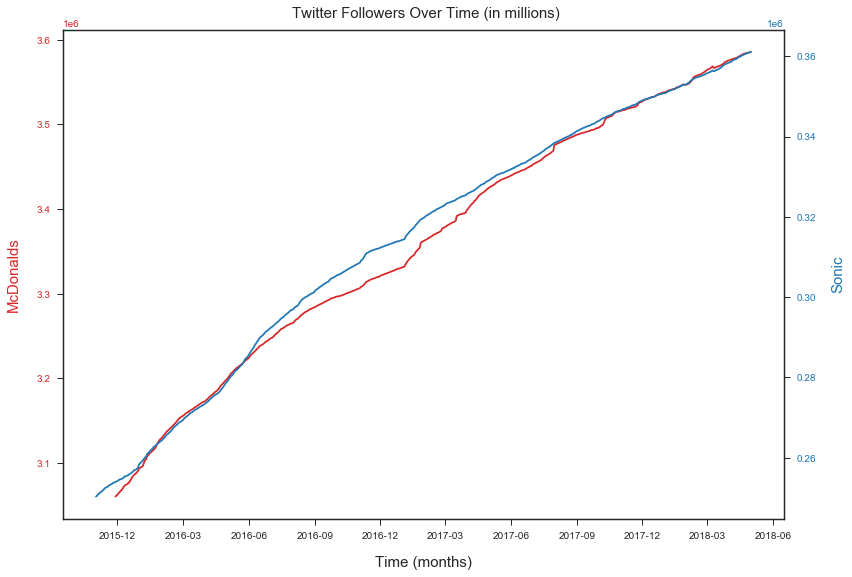

In [9]:
st.compare_col_date(df,'Followers','2018-05','McDonalds','sonicdrivein')

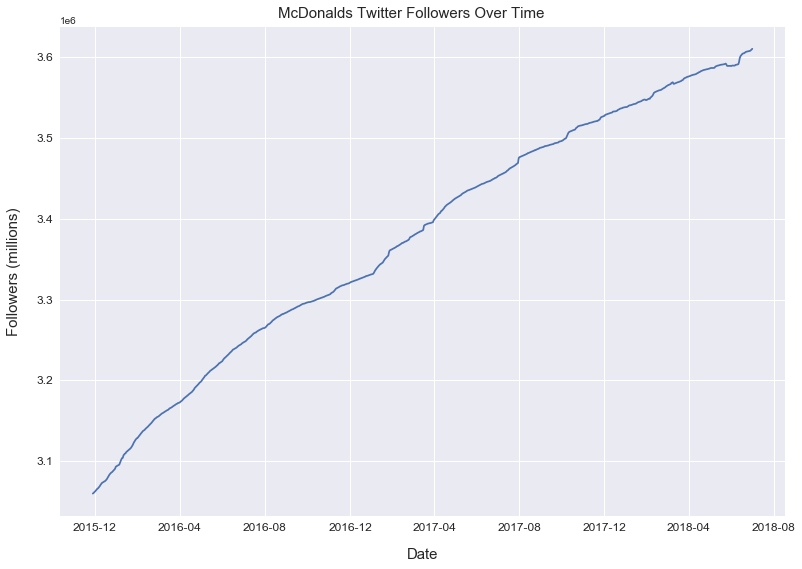

In [10]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

class FixedOrderFormatter(ScalarFormatter):
    """Formats axis ticks using scientific notation with a constant order of 
    magnitude"""
    def __init__(self, order_of_mag=0, useOffset=True, useMathText=False):
        self._order_of_mag = order_of_mag
        ScalarFormatter.__init__(self, useOffset=useOffset, 
                                 useMathText=useMathText)
    def _set_orderOfMagnitude(self, range):
        """Over-riding this to avoid having orderOfMagnitude reset elsewhere"""
        self.orderOfMagnitude = self._order_of_mag
#fig1.suptitle('Facebook Likes Over Time')
sns.set(style="darkgrid")
fig = plt.figure(figsize=(13,9))
ax = fig.add_subplot(111)
fig.suptitle('McDonalds Twitter Followers Over Time',fontsize=15,y=.91)
df_mcd_us = data[data['Screen Name']=='McDonalds']
df_mcd_us = df_mcd_us[df_mcd_us['As Of Date'] <= '2018-07']
ax.plot(df_mcd_us['As Of Date'],df_mcd_us['Followers'])
#f1_axes.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.get_yaxis().get_major_formatter().set_useOffset(False)
ax.yaxis.set_major_formatter(FixedOrderFormatter(6))
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Date',labelpad=15,fontsize=15)
plt.ylabel('Followers (millions)', labelpad=15,fontsize=15)
plt.show()

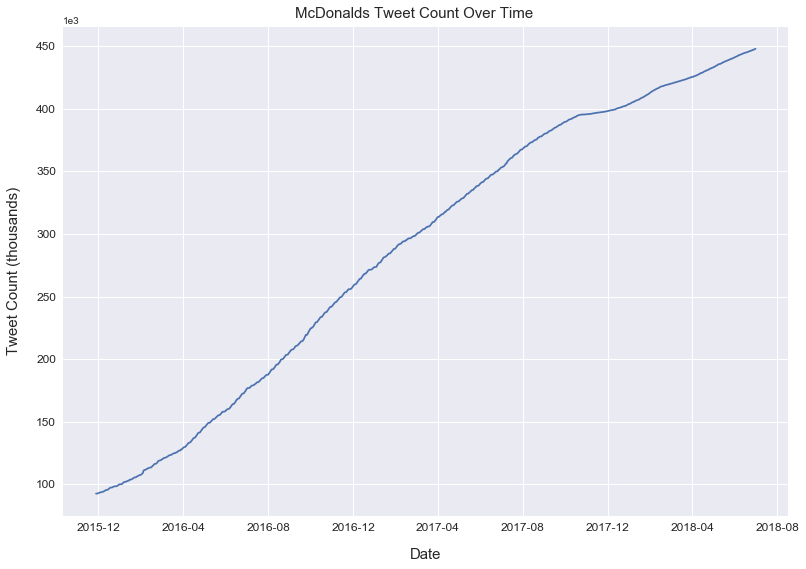

In [11]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

class FixedOrderFormatter(ScalarFormatter):
    """Formats axis ticks using scientific notation with a constant order of 
    magnitude"""
    def __init__(self, order_of_mag=0, useOffset=True, useMathText=False):
        self._order_of_mag = order_of_mag
        ScalarFormatter.__init__(self, useOffset=useOffset, 
                                 useMathText=useMathText)
    def _set_orderOfMagnitude(self, range):
        """Over-riding this to avoid having orderOfMagnitude reset elsewhere"""
        self.orderOfMagnitude = self._order_of_mag
#fig1.suptitle('Facebook Likes Over Time')
sns.set(style="darkgrid")
fig = plt.figure(figsize=(13,9))
ax = fig.add_subplot(111)
fig.suptitle('McDonalds Tweet Count Over Time',fontsize=15,y=.91)
df_mcd_us = data[data['Screen Name']=='McDonalds']
df_mcd_us = df_mcd_us[df_mcd_us['As Of Date'] <= '2018-07']
ax.plot(df_mcd_us['As Of Date'],df_mcd_us['Tweets Count'])
#f1_axes.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.get_yaxis().get_major_formatter().set_useOffset(False)
ax.yaxis.set_major_formatter(FixedOrderFormatter(3))
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Date',labelpad=15,fontsize=15)
plt.ylabel('Tweet Count (thousands)', labelpad=15,fontsize=15)
plt.show()